## 导入模块
使用以下方式来导入库:

In [1]:
import matplotlib.pyplot as plt
from sci_plot import sci_plot
from matplotlib.ticker import MultipleLocator
import matplotlib.ticker as mtick
import numpy as np
import seaborn as sns
import pandas as pd
import palettable  # python颜色库
from sklearn import datasets
from string import ascii_letters

#### 1.散点图

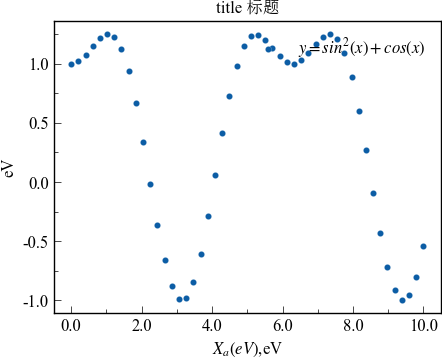

In [3]:
# 测试数据
N  = 50
x  = np.linspace(0.0, 10.0, N)
y  = np.sin(x) ** 2 + np.cos(x)
df = pd.DataFrame({"x": x, "y": y})

# 散点图
# 建立坐标系
plt.cla()
plt.style.use(["nature"])
axes = sns.scatterplot(
    data  = df,
    x     = "x",
    y     = "y",
    label = r"$y = sin^2(x)+cos(x)$",
)
axes.collections[0].set_sizes([20])  # <---- reset markersize here

sci_plot.set_style(axes, minorticks=True, visible_ticks_top_right=False)
axes.set_title("title 标题")
axes.set_xlabel("$X_{a} ({eV})$,eV")
axes.set_ylabel("eV")
axes.legend(loc="upper right")
# sci_plot.plot_as_emf(plt, inkscape_path=r"D:\toolbox\影音处理\矢量图像编辑 Inkscape\bin\inkscape.exe", dpi=600, filepath="./test2.emf")

#### 2.折线图

Text(0.5, 1.0, 'Masked and NaN data')

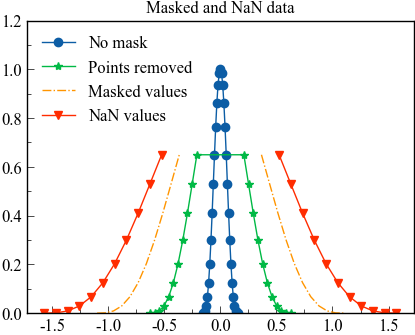

In [4]:
# 绘制带有标签和图例的多条线的折线图

# 测试数据
x = np.linspace(-np.pi / 2, np.pi / 2, 31)
y = np.cos(x) ** 3
# 1) remove points where y > 0.7
x2 = x[y <= 0.7]
y2 = y[y <= 0.7]
# 2) mask points where y > 0.7
y3 = np.ma.masked_where(y > 0.7, y)
# 3) set to NaN where y > 0.7
y4 = y.copy()
y4[y3 > 0.7] = np.nan


# 画图
plt.cla()
plt.style.use(["nature", "scatter"])
ax = plt.subplot()
ax.plot(x * 0.1, y, "o-", label="No mask")
ax.plot(x2 * 0.4, y2, "*-", label="Points removed")
ax.plot(x * 0.7, y3, "-.", label="Masked values")
ax.plot(x * 1.0, y4, "v-", label="NaN values")
ax.legend(loc="upper left")
ax.set_ylim(0, 1.2)
sci_plot.set_style(ax, visible_ticks_top_right=False)
plt.title("Masked and NaN data")
# ax.figure.set_size_inches(8, 6)

#### 3.柱状图

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


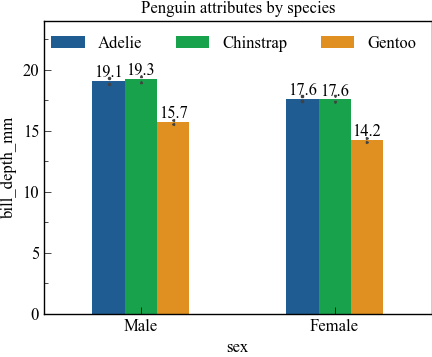

In [5]:
# 数据
penguins = sns.load_dataset("penguins")  # 导入数据
print(penguins.head())

# 画图
plt.cla()
plt.style.use(["nature"])
g = sns.barplot(
    x     = "sex",
    y     = "bill_depth_mm",
    hue   = "species",
    data  = penguins,
    width = 0.5,
)
g.set_title("Penguin attributes by species")
g.set_ylim(0, 24)
g.legend(loc="upper right", ncol=3)
for i in g.containers:
    g.bar_label(i, fmt="%.1f")
sci_plot.set_style(g, visible_ticks_top_right=False, format=[None, "%d"], x_minor=False)

#### 4.直方图

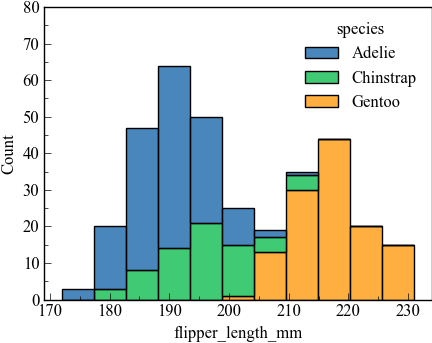

In [6]:
# 数据
penguins = sns.load_dataset("penguins")#导入数据

plt.cla()
plt.style.use(['nature'])
g = sns.histplot(
    data     = penguins,
    x        = "flipper_length_mm",
    hue      = "species",
    multiple = "stack",
    bins     = 11
                )
g.set_ylim(0, 80)
sci_plot.set_style(g, visible_ticks_top_right=False, format=["%d", "%d"])


#### 5.热图

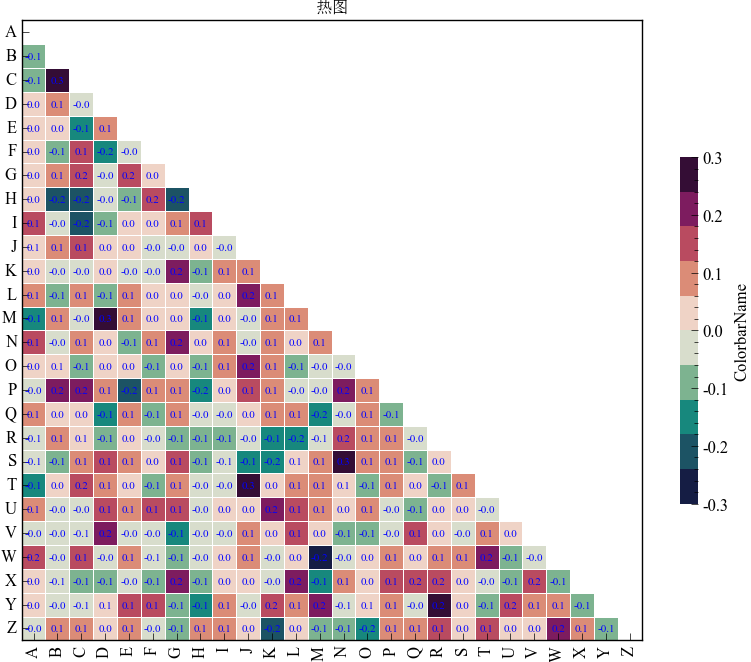

In [7]:
# 导入数据
# 生成随机数
rs = np.random.RandomState(33)  # 类似np.random.seed, 即每次括号中的种子33不变, 每次可获得相同的随机数
d  = pd.DataFrame(
    data    = rs.normal(size=(100, 26)), # normal生成高斯分布的概率密度随机数, 需要在变量rs下使用
    columns = list(ascii_letters[26:]),
)
d.to_csv("d.csv", index=False)
# corr函数计算相关性矩阵(correlation matrix)
dcorr = d.corr(method="pearson")  # 默认为'pearson'检验,可选'kendall','spearman'


plt.cla()
plt.style.use(["nature", "scatter"])
gg = sns.heatmap(
    data=dcorr,  # 矩阵数据集,数据的index和columns分别为heatmap的y轴方向和x轴方向标签
    cmap=palettable.cmocean.diverging.Curl_10.mpl_colors,  # 使用matplotlib中的颜色盘
    vmin=-0.3,  # 图例（右侧颜色条color bar）中最小显示值
    vmax=0.3,  # 图例（右侧颜色条color bar）中最大显示值
    # center=7,#color bar的中心数据值大小,可以控制整个热图的颜盘深浅
    annot=True,  # 默认为False,当为True时,在每个格子写入data中数据
    fmt=".1f",  # 设置每个格子中数据的格式,此处保留两位小数
    annot_kws={"size": 8, "weight": "normal", "color": "b"},  # 设置格子中数据的大小、粗细、颜色
    # cbar=False,#右侧图例(color bar)开关,默认为True显示
    mask=np.triu(np.ones_like(dcorr, dtype=bool)),  # 显示对脚线下面部分图
    cbar_kws={
        "label": "ColorbarName",  # color bar的名称
        # 'orientation': 'horizontal',#color bar的方向设置,默认为'vertical',可水平显示'horizontal'
        # "ticks":np.arange(-0.3,0.3,0.1),#color bar中刻度值范围和间隔
        "format": "%.1f",  # 格式化输出color bar中刻度值
        "pad": 0.05,  # color bar与热图之间距离,距离变大热图会被压缩
        "shrink": 0.5,
    },
    # xticklabels=['a1','a2','a3','a4','a5','a6'] , #x轴方向刻度标签开关、赋值,可选“auto”, bool, list-like（传入列表）, or int,
    xticklabels=True,  # y轴方向刻度标签开关、同x轴
    yticklabels=True,  # y轴方向刻度标签开关、同x轴
    square=True,
    linewidths=0.5,  # 每个方格外框显示,外框宽度设置
)
plt.title("热图")
sci_plot.set_style(gg, minorticks=False, visible_ticks_top_right=False)
gg.spines["top"].set_visible(True)
gg.spines["right"].set_visible(True)
gg.spines["bottom"].set_visible(True)
gg.spines["left"].set_visible(True)
gg.figure.set_size_inches(10, 9)

#### 6.热图(cell可变)

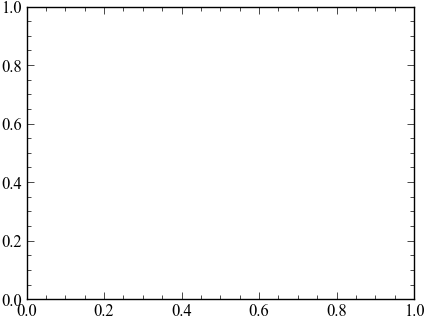

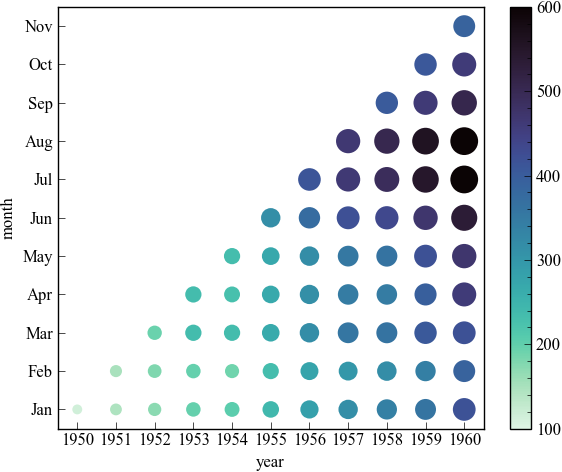

In [8]:
# 画cell可变的热图
flights = sns.load_dataset("flights")
# 按yearz再按month排序
flights = flights.sort_values(["year", "month"])
passengers = flights.passengers.to_numpy().reshape(12, 12)
mask = np.triu(np.ones_like(passengers, dtype=bool))  # 上三角
# mask = np.tril(np.ones_like(passengers, dtype=bool)) #下三角
passengers = np.ma.array(passengers, mask=mask).flatten()
flights = flights.assign(passengers=passengers)

plt.cla()
plt.style.use(["nature", "scatter"])
g = sns.relplot(
    x         = "year",
    y         = "month",
    hue       = "passengers",
    size      = "passengers",
    hue_norm  = (100, 600),
    size_norm = (100, 600),   # 对应数据集的极值
    palette   = "mako_r",
    sizes     = (40, 400),
    marker    = "o",
    linewidth = 0,
    legend    = False,
    aspect    = 1.25,
    data      = flights,
)
g.ax.invert_yaxis()
ghost = g.ax.scatter([], [], c=[], vmin=100, vmax=600, cmap="mako_r")
g.fig.colorbar(ghost)
ax = plt.gca()  # 获取边框
ax.spines["top"].set_visible(True)
ax.spines["right"].set_visible(True)
ax.spines["bottom"].set_visible(True)
ax.spines["left"].set_visible(True)
sci_plot.set_style(ax, minorticks=False, xtick=1, visible_ticks_top_right=False)
# sci_plot.plot_as_emf(plt, inkscape_path=r"D:\toolbox\影音处理\矢量图像编辑 Inkscape\bin\inkscape.exe", dpi=600, filepath="./re.emf")

#### 7.热图(R语言)

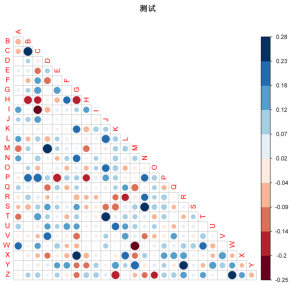

In [8]:
# 使用R语言画热图
from rpy2.robjects import r
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
import pandas as pd

corrplot = importr("corrplot")
ggplot2  = importr("ggplot2")
ggpubr   = importr("ggpubr")
devEMF   = importr("devEMF")

r_script = """
data_test <- read.csv("./d.csv", header = T)
data <- cor(data_test, method = "pearson")
emf(file = "corrplot.emf", emfPlus = FALSE,coordDPI = 600)
g <- corrplot(data,
        method = "circle",
        col = COL2("RdBu", 10),
        type = "lower",
        diag = FALSE,
        number.cex=1.2,
        title = "测试",
        mar = c(0, 0, 2, 0),         # 下 左 上 右 边距
        is.corr =FALSE,
        addgrid.col = NULL,          # 网格线的颜色,NA为不绘制,NULl为默认的灰色
        bg = NULL,                # 背景颜色
        cl.pos = "r",                # 图例位置：r：右边 b：下边 n：不显示
        tl.pos = "ld",               # 坐标轴标签的位置'lt', 'ld', 'td', 'd' or 'n'   # 左边 d中间
)
par(family = "Times New Roman") # 设置全局使用Times New Roman字体,英文字体分为Serif和Sans-Serif字体。Times New Roman是一种Serif字体,Arial是一种Sans-Serif字体。
dev.off()
"""
r(r_script)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 读取.emf文件
emf_data = mpimg.imread("./corrplot.emf")

# 显示.emf图像
plt.imshow(emf_data)
plt.axis("off")  # 关闭坐标轴
# 显示大一点
plt.show()

#### 8.边际图

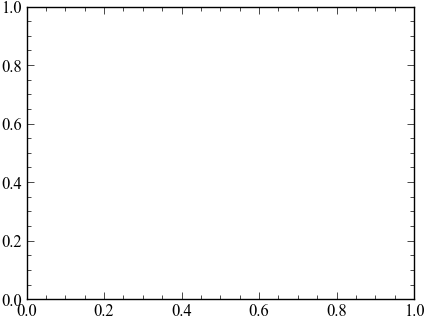

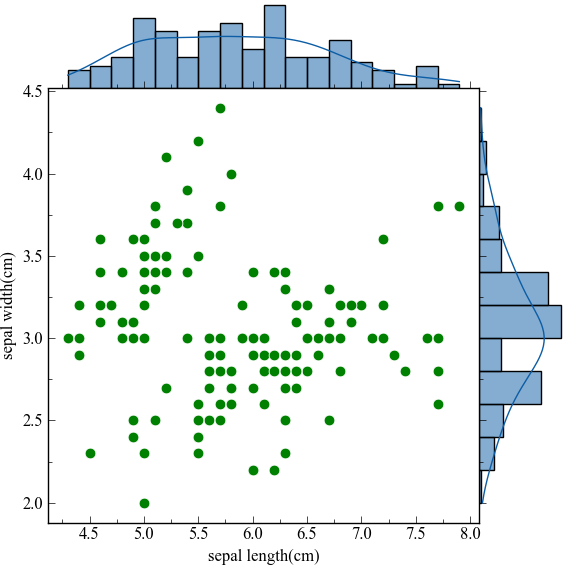

In [9]:
# 画边际图

# 导入鸢尾花iris数据集（方法一）
# 该方法更有助于理解数据集
iris = datasets.load_iris()
x, y = iris.data, iris.target
y_1 = np.array(
    ["setosa" if i == 0 else "versicolor" if i == 1 else "virginica" for i in y]
)
pd_iris = pd.DataFrame(
    np.hstack((x, y_1.reshape(150, 1))),
    columns=[
        "sepal length(cm)",
        "sepal width(cm)",
        "petal length(cm)",
        "petal width(cm)",
        "class",
    ],
)

# astype修改pd_iris中数据类型object为float64
pd_iris["sepal length(cm)"] = pd_iris["sepal length(cm)"].astype("float64")
pd_iris["sepal width(cm)"] = pd_iris["sepal width(cm)"].astype("float64")
pd_iris["petal length(cm)"] = pd_iris["petal length(cm)"].astype("float64")
pd_iris["petal width(cm)"] = pd_iris["petal width(cm)"].astype("float64")


# 画图
plt.cla()
plt.style.use(["nature"])
g = sns.JointGrid(
    x     = "sepal length(cm)",
    y     = "sepal width(cm)",
    data  = pd_iris,
    space = 0  # 关节轴和边缘轴之间的空间
)
g = g.plot_joint(sns.scatterplot, color="g", s=60)  # 中心绘制散点图
g = g.plot_marginals(sns.histplot, kde=True, binwidth=0.2)  # 边际绘制hist直方图
g.ax_marg_x.tick_params(axis="x", which="both", top=False, labelbottom=False)
g.ax_marg_y.tick_params(axis="y", which="both", right=False, labelbottom=False)
sci_plot.set_style(g.ax_joint.axes, visible_ticks_top_right=False)

#### 9.边际图2

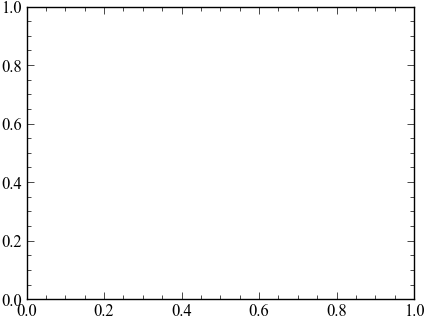

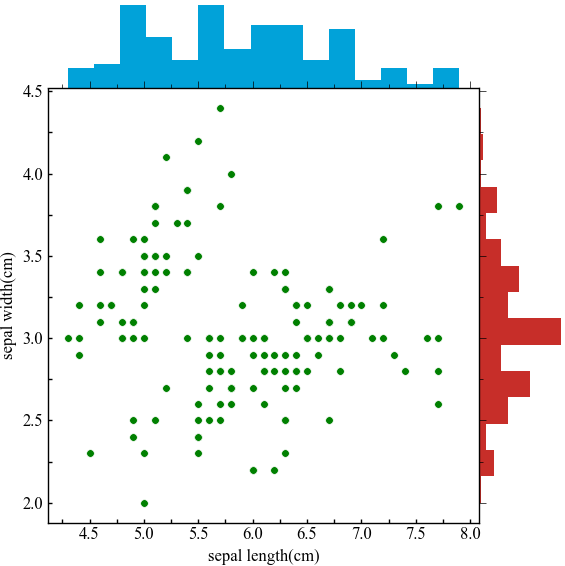

In [10]:
# 画图
plt.cla()
plt.style.use(["nature"])
g = sns.JointGrid(x="sepal length(cm)", y="sepal width(cm)", data=pd_iris, space=0)
g.plot_joint(sns.scatterplot, color="g", s=30)
g.ax_joint.tick_params(axis="both", which="both", direction="in", width=1, length=3)
# x轴方向边际图
g.ax_marg_x.hist(
    pd_iris["sepal length(cm)"],
    color = "#01a2d9",
    alpha = 1,
    bins  = 15,
)
# y轴方向边际图 #开启核密度图
g.ax_marg_y.hist(
    pd_iris["sepal width(cm)"],
    color       = "#c72e29",
    alpha       = 1,
    orientation = "horizontal",
    bins        = 15,
)
g.ax_marg_x.tick_params(axis="x", which="both", top=False, labelbottom=False)
g.ax_marg_y.tick_params(axis="y", which="both", right=False, labelbottom=False)
sci_plot.set_style(g.ax_joint.axes, visible_ticks_top_right=False)

#### 10.箱型图

  sepal length(cm) sepal width(cm) petal length(cm) petal width(cm)   class
0              5.1             3.5              1.4             0.2  setosa
1              4.9             3.0              1.4             0.2  setosa
2              4.7             3.2              1.3             0.2  setosa
3              4.6             3.1              1.5             0.2  setosa
4              5.0             3.6              1.4             0.2  setosa


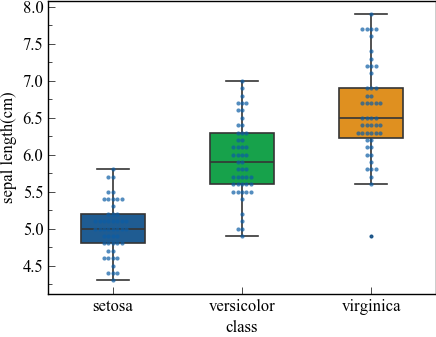

In [11]:
# 箱型图
iris = datasets.load_iris()
x, y = iris.data, iris.target
y_1 = np.array(
    ["setosa" if i == 0 else "versicolor" if i == 1 else "virginica" for i in y]
)
pd_iris = pd.DataFrame(
    np.hstack((x, y_1.reshape(150, 1))),
    columns=[
        "sepal length(cm)",
        "sepal width(cm)",
        "petal length(cm)",
        "petal width(cm)",
        "class",
    ],
)
print(pd_iris.head())
pd_iris["sepal length(cm)"] = pd_iris["sepal length(cm)"].astype("float")

# 画图
plt.cla()
plt.style.use(["nature"])
g = sns.boxplot(
    x="class",  # X轴
    y="sepal length(cm)",  # y轴
    hue="class",  # 调色
    data=pd_iris,  # 数据
    # order=None, # 指定排序字段
    # hue_order=None, # 调色板字段的排序
    # orient=None,# 水平还是垂直
    # color=None,# 统一设置所有箱体的颜色
    # palette="rainbow", # 颜色面板
    # saturation=0.75,# 颜色饱和度
    width=0.5,  # 设置箱体宽度
    dodge=False,  # 是否重叠绘制 (设置hue之后生效)
    # fliersize=5,# 箱体上方离群点的大小
    linewidth=1.2,  # 箱体边框线的粗细
    # whis=1.5,# 确定离群值的上下界 (IQR超过低和高四分位数的比例)
    # ax=None,
)
sns.swarmplot(x="class", y="sepal length(cm)", data=pd_iris, size=3, dodge=False, color="#0C5DA5", alpha = 0.7)
sci_plot.set_style(
    g, visible_ticks_top_right=False, format=[None, "%.1f"], x_minor=False
)

#### 11.分组箱线图

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


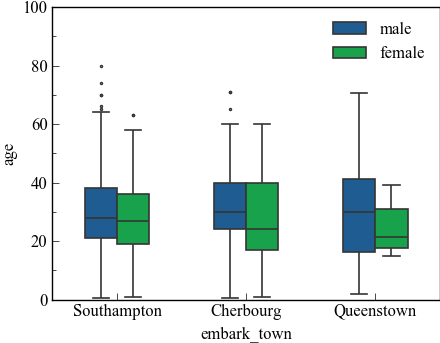

In [12]:
# 箱型图
titanic = sns.load_dataset("titanic")
print(titanic.head())

# 画图
plt.cla()
plt.style.use(["nature"])
g = sns.boxplot(
    x="embark_town",  # X轴
    y="age",
    hue="sex",  # 调色
    data=titanic,  # 数据
    # order=None, # 指定排序字段
    # hue_order=None, # 调色板字段的排序
    # orient=None,# 水平还是垂直
    # color=None,# 统一设置所有箱体的颜色
    # palette="rainbow", # 颜色面板
    # saturation=0.75,# 颜色饱和度
    width=0.5,  # 设置箱体宽度
    dodge=True,  # 是否重叠绘制 (设置hue之后生效)
    # fliersize=5,# 箱体上方离群点的大小
    linewidth=1.2,  # 箱体边框线的粗细
    # whis=1.5,# 确定离群值的上下界 (IQR超过低和高四分位数的比例)
    # ax=None,
)
g.set_ylim(0, 100)
g.legend(loc="upper right")
sci_plot.set_style(g, visible_ticks_top_right=False, format=[None, "%d"], x_minor=False)

           island
count            
Biscoe        168
Dream         124
Torgersen      52


Text(0.5, 1.0, 'island')

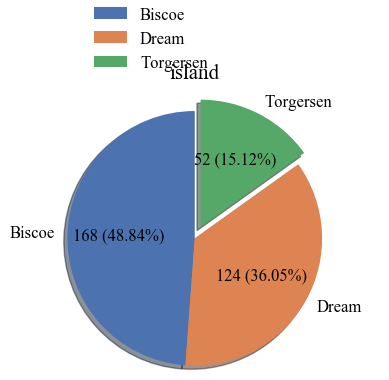

In [16]:
# 数据
penguins = sns.load_dataset("penguins")  # 导入数据
data = penguins['island'].value_counts().to_frame()
data.index.name = 'count'
print(data)
def make_autopct(product):
    def my_autopct(pct):
        total = product.sum()
        val = int(round(pct*total/100.0))
        # 同时显示数值和占比的饼图
        return f'{val:d} ({pct:.2f}%)'
    return my_autopct

# 饼图
plt.cla()
plt.style.use(["nature"])
explode = [0]*data.index.__len__()
explode[2] = 0.1
plt.pie(
    data=data,
    x='island',
    labels=data.index,
    explode=explode,
    autopct=make_autopct(data),
    startangle=90,
    colors=sns.color_palette("deep"),
    shadow=True,
    )
plt.axis('equal')
plt.legend(bbox_to_anchor=(0.2, 1))
plt.title('island',fontsize=15)

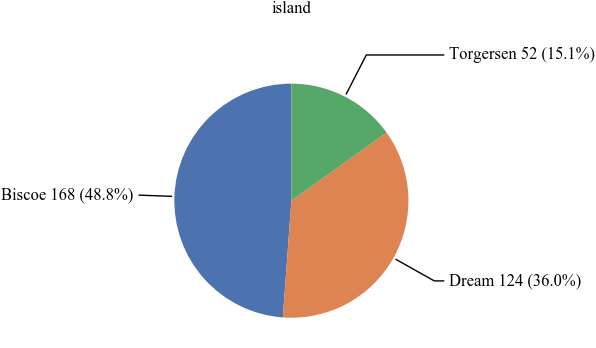

In [18]:
# 饼图+引导线
plt.cla()
plt.style.use(["nature"])
data_new_ = data.T
wedges, texts = plt.pie(
    data_new_.iloc[0], 
    startangle=90,
    colors=sns.color_palette("deep")
    )
n_total = data['island'].sum()
# 位置靠上一点
plt.title("island", pad=30)
# 构造annotate函数的**kwargs参数，设置引导线线型
kw = dict(arrowprops=dict(arrowstyle="-"), zorder=0, va="center")
# 遍历饼块绘制注释标签和引导线
for i, p in enumerate(wedges):
    # 根据matplotlib.patches.Wedge对象的theta1和theta2参数计算饼块均分点的角度
    ang = (p.theta2 - p.theta1) / 2.0 + p.theta1
    # 根据角度的弧度计算 饼块均分点的坐标（引导线的起点）
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    # print(p.theta1, p.theta2, ang, np.deg2rad(ang), x, y)
    # 演示引导线起点位置
    # plt.plot(x, y, "or")
    # 根据x的值即角度所在象限确定引导线的对齐方式
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    # 设置引导线的连接方式
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    # 绘制注释标签和引导线
    plt.annotate(
        f"{data_new_.columns[i]} {data_new_.iloc[0,i]:d} ({data_new_.iloc[0,i]*100/n_total:.1f}%)",
        xy=(x, y),
        xytext=(1.35 * np.sign(x), 1.4 * y),
        horizontalalignment=horizontalalignment,
        **kw
    )